In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Временные ряды

Временные ряды — это наборы данных, где каждая точка данных связана с определенным моментом времени. Это может быть что угодно, от ежедневных финансовых показателей до ежечасных кликов на веб-сайте или даже месячных показателей погоды. 

Области, где временные ряды играют решающую роль:

1. Финансовая аналитика: Прогнозирование цен акций, анализ рыночных тенденций и определение оптимального времени для инвестиций.

2. Маркетинг и анализ пользовательской активности: Отслеживание изменений в поведении пользователей на веб-сайте, прогнозирование спроса на товары и услуги.

3. Прогнозирование спроса: Определение оптимального уровня запасов, чтобы избежать дефицита или избытка товаров.

4. Анализ временных данных о заболеваниях: Оценка распространения эпидемий, прогнозирование заболеваемости и смертности.

5. Климатические исследования: Изучение изменений в климатических параметрах, таких как температура и осадки, для анализа климатических тенденций.

6. Прогнозирование трафика: Анализ и прогнозирование трафика на веб-сайтах и в сетях.

7. Промышленное оборудование и обслуживание: Предсказание времени отказа оборудования и оптимизация производственных процессов.


Временные ряды могут быть стационарными (когда статистические характеристики, такие как среднее и дисперсия, остаются постоянными во времени) или нестационарными (когда эти характеристики изменяются с течением времени). Понимание природы временного ряда важно для выбора подходящих методов анализа.

## Основные характеристики временных рядов

__Тренд__: Тренд представляет собой долгосрочное изменение в данных. Это может быть рост или спад. Например, если продажи вашей компании растут каждый месяц в течение года, это будет проявление тренда.

__Сезонность__: Сезонность — это циклические изменения данных, которые повторяются с постоянным интервалом времени. Например, продажи игрушек могут расти перед праздниками и падать после них.

__Шум__: Шум представляет собой случайные колебания данных, которые не подчиняются определенным закономерностям. Это может быть вызвано различными факторами, такими как случайные события или ошибки измерения.

__Циклы__: Циклы — это долгосрочные колебания данных, которые не связаны с сезонностью. Например, экономические циклы могут вызывать волны роста и спада в продажах.

__Стационарность__: Стационарный временной ряд — это ряд, в котором статистические характеристики, такие как среднее и дисперсия, остаются постоянными с течением времени. Многие методы анализа временных рядов предполагают стационарность данных.

__Автокорреляция__: Автокорреляция — это корреляция между значениями ряда в разные моменты времени. Она может помочь выявить закономерности в данных.

__Пропущенные значения__: Временные ряды могут содержать пропущенные значения, которые требуется обработать перед анализом.

## Подготовка к анализу

Прежде чем мы начнем работу, нам нужно убедиться, что у нас есть все необходимые библиотеки для анализа временных рядов:

1. pandas: Pandas — это библиотека для работы с данными, которая предоставляет удобные структуры данных, такие как DataFrame, и множество функций для анализа и манипуляции данными. Она идеально подходит для работы с временными рядами, так как позволяет легко хранить и анализировать временные данные.

2. numpy: NumPy — это библиотека для работы с массивами и матрицами чисел. Она полезна при выполнении вычислений над данными временных рядов.

3. matplotlib и seaborn: Эти библиотеки позволяют создавать графики и визуализации данных, что особенно важно при анализе временных рядов.

4. statsmodels: Statsmodels — это библиотека для статистического анализа данных. Она содержит множество методов для анализа временных рядов, включая модели ARIMA и SARIMA.

# Начало работы с временными рядами

Создадим DataFrame

In [66]:
data = {'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
        'Sell': [1000, 1200, 1300, 1100, 1400]}

df = pd.DataFrame(data)

df

,Date,Sell
0,2023-01-01,1000
1,2023-02-01,1200
2,2023-03-01,1300
3,2023-04-01,1100
4,2023-05-01,1400


In [67]:
# посмотрим на типы данных
df.dtypes

Date    object
Sell     int64
dtype: object

Мы видим, что столбец с датами имеет тип `object`, который на самом деле содержит значения строкового типа `str`

In [68]:
type(df['Date'][0])

str

Для корректной работы необходимо преобразовать их к типу дата-время

In [69]:
df["Date"] = pd.to_datetime(df['Date'])
df.dtypes

Date    datetime64[ns]
Sell             int64
dtype: object

Теперь мы можем пользоваться поиском по датам и другими преобразованиями, связанными с датой-временем

In [70]:
df.loc[0, 'Date']

Timestamp('2023-01-01 00:00:00')

In [73]:
df.loc[0, 'Date'].month

1

In [14]:
# Выбрать значения за март и февраль
df.loc[df['Date'].dt.month.isin([2, 3])]

,Date,Sell
1,2023-02-01,1200
2,2023-03-01,1300


Можно установить дату-время как индекс нашего датафрейма

In [15]:
df_time = df.set_index('Date')
df_time

,Sell
Date,
2023-01-01,1000
2023-02-01,1200
2023-03-01,1300
2023-04-01,1100
2023-05-01,1400


И проводить поиск по условию индекса

In [16]:
df_time.loc[df_time.index.month.isin([2, 3])]

,Sell
Date,
2023-02-01,1200
2023-03-01,1300


Создадим DataFrame из случайных чисел с индексом дата-время с шагом в 2 часа длинной 100 начиная с 1 января 2021 года

In [75]:
dti = pd.date_range('1-1-2021', periods=100, freq='2h')
df = pd.DataFrame({'sell': np.random.rand(100)*100}, index=dti)
df

,sell
2021-01-01 00:00:00,62.001594
2021-01-01 02:00:00,37.002775
2021-01-01 04:00:00,87.793443
2021-01-01 06:00:00,0.971878
2021-01-01 08:00:00,80.094269
...,...
2021-01-08 22:00:00,89.340336
2021-01-09 00:00:00,7.373823
2021-01-09 02:00:00,64.021610
2021-01-09 04:00:00,85.732903


In [77]:
dti

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 02:00:00',
               '2021-01-01 04:00:00', '2021-01-01 06:00:00',
               '2021-01-01 08:00:00', '2021-01-01 10:00:00',
               '2021-01-01 12:00:00', '2021-01-01 14:00:00',
               '2021-01-01 16:00:00', '2021-01-01 18:00:00',
               '2021-01-01 20:00:00', '2021-01-01 22:00:00',
               '2021-01-02 00:00:00', '2021-01-02 02:00:00',
               '2021-01-02 04:00:00', '2021-01-02 06:00:00',
               '2021-01-02 08:00:00', '2021-01-02 10:00:00',
               '2021-01-02 12:00:00', '2021-01-02 14:00:00',
               '2021-01-02 16:00:00', '2021-01-02 18:00:00',
               '2021-01-02 20:00:00', '2021-01-02 22:00:00',
               '2021-01-03 00:00:00', '2021-01-03 02:00:00',
               '2021-01-03 04:00:00', '2021-01-03 06:00:00',
               '2021-01-03 08:00:00', '2021-01-03 10:00:00',
               '2021-01-03 12:00:00', '2021-01-03 14:00:00',
               '2021-01-

Создадим DataFrame из случайных чисел с индексом дата-время с шагом в 2 часа начиная с 1 января 2021 года и заканчивая 20 февраля 2021 года

In [79]:
dti = pd.date_range(start='1/1/2021', end='2/2/2021', freq='2h')
df = pd.DataFrame({'sell': np.random.rand(len(dti))*100}, index=dti)
df

,sell
2021-01-01 00:00:00,96.379206
2021-01-01 02:00:00,16.029620
2021-01-01 04:00:00,61.273504
2021-01-01 06:00:00,26.108413
2021-01-01 08:00:00,10.187828
...,...
2021-02-01 16:00:00,22.633434
2021-02-01 18:00:00,69.342890
2021-02-01 20:00:00,52.640462
2021-02-01 22:00:00,86.455348


Возникает предупреждение, что по умолчанию распознается американский формат даты ММ/ДД/ГГГГ. Он попробовал по своему усмотрению использовать формат ДД/ММ/ГГГГ (потому что месяц на может быть больше 12), но иногда это может вызвать ошибку.

Лучше такие моменты указывать явно.

In [82]:
dti = pd.date_range(start=pd.to_datetime('1/1/2021 00:00:00', dayfirst=True), 
                    end=pd.to_datetime('20/2/2021 22:00:00', dayfirst=True), 
                    freq='h')
df = pd.DataFrame({'sell': np.random.rand(len(dti))*100}, index=dti)
df

,sell
2021-01-01 00:00:00,10.579056
2021-01-01 01:00:00,68.551658
2021-01-01 02:00:00,84.356546
2021-01-01 03:00:00,99.418586
2021-01-01 04:00:00,18.413422
...,...
2021-02-20 18:00:00,70.496789
2021-02-20 19:00:00,47.939152
2021-02-20 20:00:00,85.154924
2021-02-20 21:00:00,79.056681


Давайте соберем сумму продаж по суткам

In [21]:
df.groupby(df.index.day).sum()

,sell
1,2423.571708
2,2579.258609
3,2128.180827
4,2620.015157
5,2292.007482
6,2377.830043
7,2166.413363
8,2296.950592
9,2287.776512
10,2452.367359


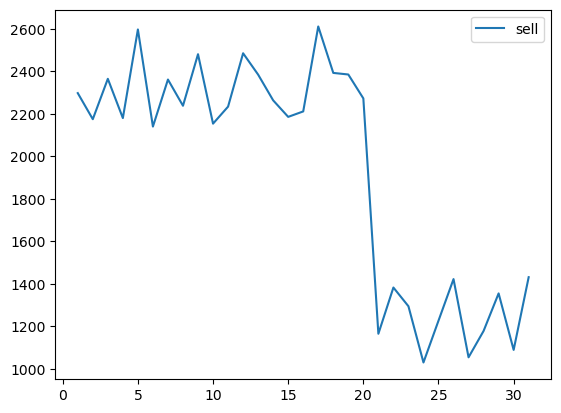

In [83]:
df.groupby(df.index.day).sum().plot();

<div class="alert alert-warning">В данном случае группировка выделила <b>только</b> дни и не выделила месяцы и мы получили неверные результаты.</div>

Правильнее будет так:

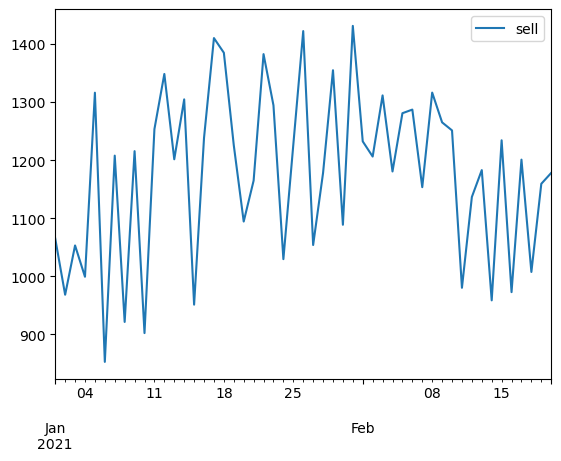

In [84]:
df.groupby(pd.to_datetime(df.index).to_period('D')).sum().plot();

In [88]:
df.groupby(pd.to_datetime(df.index).to_period('D')).sum()[:10]

,sell
2021-01-01,1065.045453
2021-01-02,968.321126
2021-01-03,1053.132783
2021-01-04,999.251531
2021-01-05,1315.951050
2021-01-06,852.809170
2021-01-07,1207.672454
2021-01-08,921.529345
2021-01-09,1215.375982
2021-01-10,902.341251


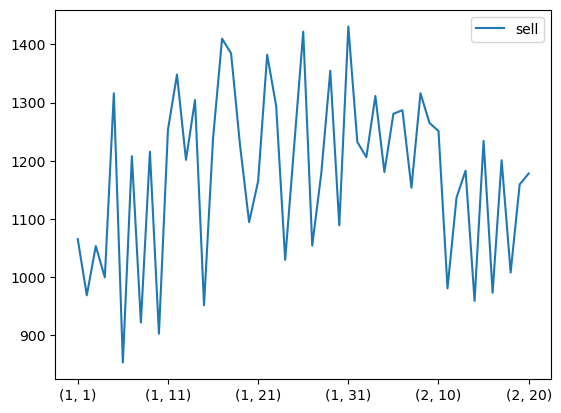

In [86]:
df.groupby([df.index.month, df.index.day]).sum().plot();

In [89]:
df.groupby([df.index.month, df.index.day]).sum()[:10]

sell
1 1   1065.045453
  2    968.321126
  3   1053.132783
  4    999.251531
  5   1315.951050
  6    852.809170
  7   1207.672454
  8    921.529345
  9   1215.375982
  10   902.341251

In [25]:
pd.Series(df.index.weekday).value_counts()

4    192
5    191
6    168
0    168
1    168
2    168
3    168
Name: count, dtype: int64

In [26]:
df.groupby(df.index.weekday).count()

,sell
0,168
1,168
2,168
3,168
4,192
5,191
6,168


yfinance offers a threaded and Pythonic way to download market data from Yahoo!Ⓡ finance.

https://pypi.org/project/yfinance/ 

In [90]:
# !pip install yfinance

In [27]:
import yfinance as yf

In [116]:
msft = yf.download("MSFT", start="2020-01-01", end="2023-04-08")

[*********************100%%**********************]  1 of 1 completed


In [117]:
msft.shape

(822, 6)

In [118]:
msft.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [119]:
msft.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,154.215668,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.295395,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,152.689072,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.296906,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,153.706787,27746500


Посчитаем среднюю за 50 дней цену закрытия

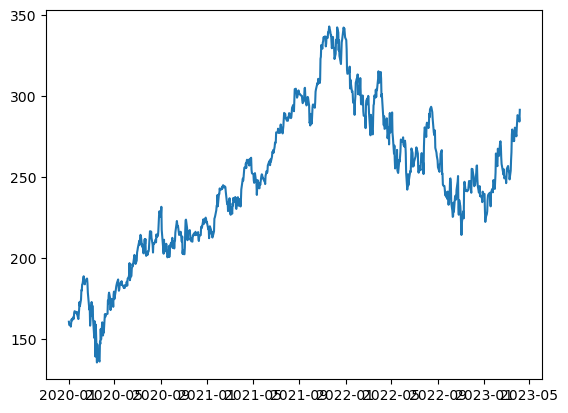

In [120]:
plt.plot(msft['Close'])
plt.show()

In [121]:
msft["SMA_50"] = msft["Close"].rolling(window=50).mean()

Нарисуем график, для демонстрации

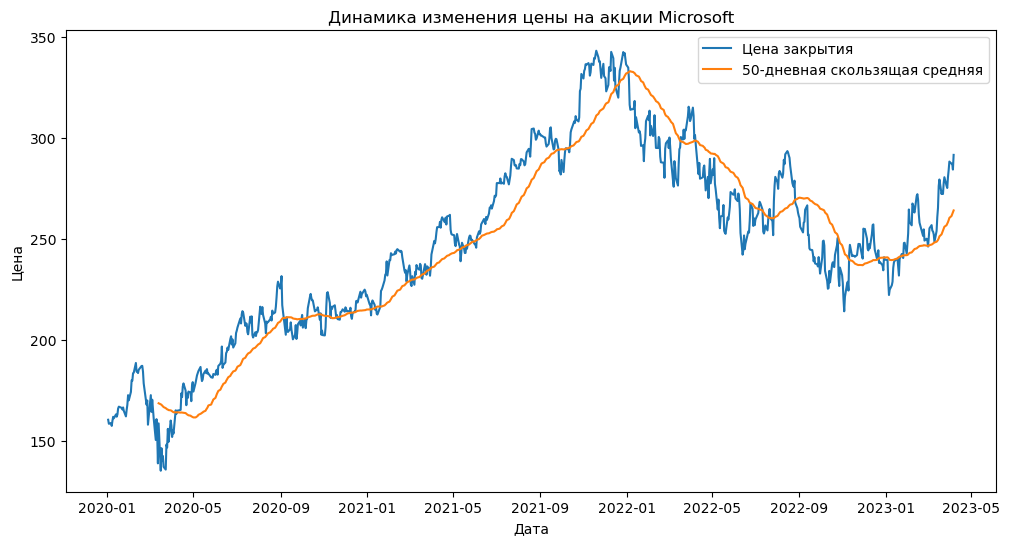

In [122]:
plt.figure(figsize=(12, 6)) 
plt.plot(msft["Close"], label="Цена закрытия")
plt.plot(msft["SMA_50"], label="50-дневная скользящая средняя") 
plt.title("Динамика изменения цены на акции Microsoft") 
plt.xlabel("Дата")
plt.ylabel("Цена") 
plt.legend() 
plt.show()

Наряду с поиском устойчивых трендов, при помощи скользящей средней, анализ временных рядов также связан с изучением динамики относительных изменений исследуемых показателей. Это может включать в себя вычисление процентного изменения показателей относительно предыдущих значений, что позволяет выявить сезонность, цикличность и другие закономерности в изменениях показателей. Такой анализ может помочь более точно оценить, насколько значимы изменения в показателях, а также сделать более обоснованные выводы на основе данных временных рядов.

В Pandas для создания лаговых переменных можно использовать метод `shift()`. Он смещает данные на указанное количество строк вверх или вниз. Это полезно, когда нужно сравнить значения на текущей строке с предыдущими или будущими значениями. Например, мы можем сместить данные на одну строку вниз, чтобы сравнить значения на текущей строке с предыдущей строкой. Мы также можем сместить данные на несколько строк вверх, чтобы сравнить значения на текущей строке с будущими значениями. 

Лаговые переменные часто используются для расчета разностей между текущими и предыдущими значениями временного ряда. Это полезно при анализе стационарности и сезонности в данных.

Мы можем использовать метод `shift()` и рассчитать показатель ежедневного колебания цены закрытия на акции в процентах.

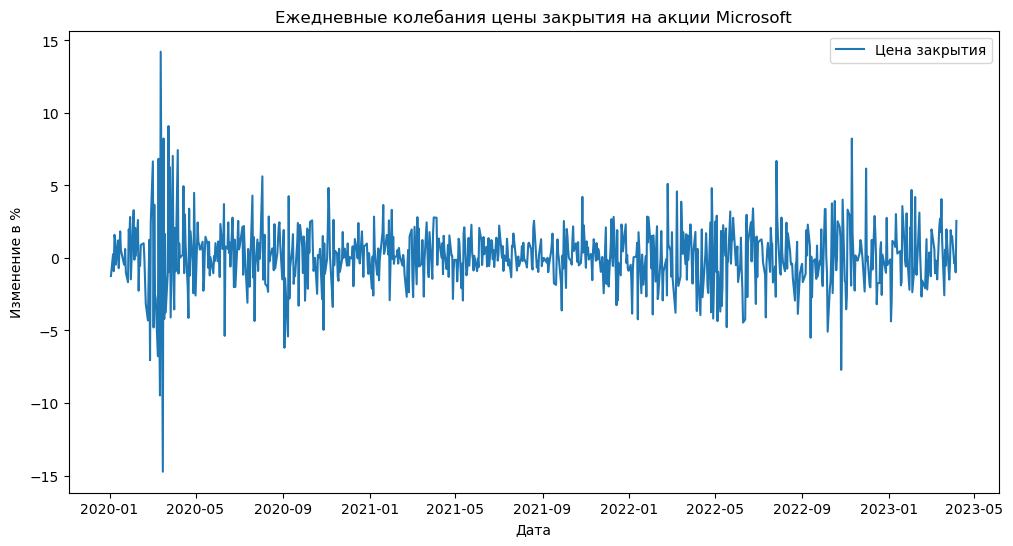

In [123]:
plt.figure(figsize=(12, 6))
plt.plot((msft.Close/msft.Close.shift(1) - 1)*100, label="Цена закрытия") 
plt.title("Ежедневные колебания цены закрытия на акции Microsoft") 
plt.xlabel("Дата")
plt.ylabel("Изменение в %") 
plt.legend()
plt.show()

Также с помощью метода `shift()` можно вычислять среднемесячные или среднегодовые изменения исследуемых показателей.

Например, чтобы рассчитать среднемесячное изменение цены закрытия акций, можно использовать метод `shift()` с аргументом `freq=pd.DateOffset(months=1)`, чтобы сдвинуть цену закрытия на один месяц назад. Затем можно рассчитать отношение текущей цены закрытия к цене закрытия месяц назад и вычесть из него единицу, чтобы получить процентное изменение цены за месяц.

## Экспоненциальное сглаживание

In [124]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

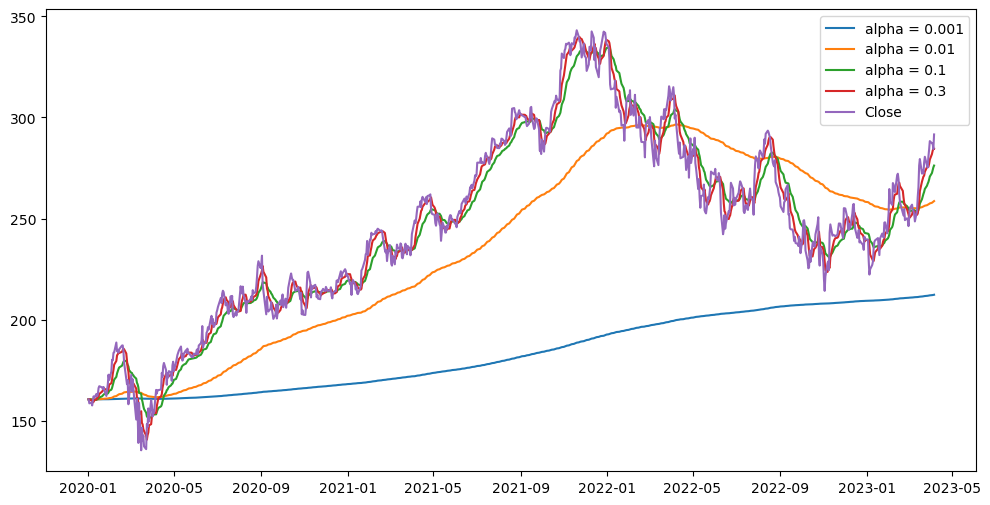

In [125]:

# Perform simple exponential smoothing
plt.figure(figsize=(12, 6))
model = SimpleExpSmoothing(np.asarray(msft['Close']))
model._index = pd.to_datetime(msft.index)
for alpha in [0.001, 0.01, 0.1, 0.3]:
    ses_model = model.fit(smoothing_level=alpha, optimized=False)
    name = 'ses_a_' + str(alpha)
    msft[name] = ses_model.fittedvalues
    plt.plot(msft[name], label=f'alpha = {alpha}')

plt.plot(msft['Close'], label='Close')
plt.legend()
plt.show()


# Анализ временных рядов

Условия стационарности:
- У ряда отсутствует тренд
- У ряда отсутствует сезонность
- У ряда не изменяется дисперсия

Тренд — это общее поведение ряда. Например постепенно среднее значение увеличивается от 100 до 400–450.

Сезонность. Замеры раз в 12 месяцев сильно похожи друг на друга. Например, пики на графики наблюдаются в один и тот же месяц.

Дисперсия. В начале и в течение года данные не сильно изменялись. А под конец максимальный замер уже значительно отличается от минимального.

Первый шаг в анализе временных рядов — проверка стационарности. Для этого существует несколько статистических тестов. 
- Тест Дики-Фуллера;
- Тест Филипса — Перрона;
- Тест Лейбурна;
- Тест Шмидта — Филлипса;
- Тест Квятковского — Филлипса — Шмидта — Шина;
- Тест DF — GLS;
- Тест Кохрейн.

Воспользуемся тестом Дики-Фуллера.

In [126]:
from statsmodels.tsa.stattools import adfuller

In [127]:
test = adfuller(msft['Close'])

In [128]:
test

(-1.8291519566684304,
 0.36608758848119477,
 9,
 812,
 {'1%': -3.4384289321263126,
  '5%': -2.865105979079729,
  '10%': -2.568668841575869},
 4804.910758119754)

In [129]:
if test[0]>test[4]['5%']:
    print('Ряд не стационарен')
else:
    print('OK, ряд стационарен')

Ряд не стационарен


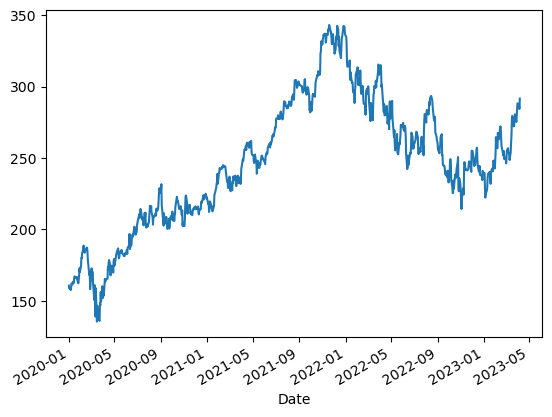

In [130]:
msft['Close'].plot();

Ряд оказался нестационарным. Что делать?
Начать преобразования ряда стоит с последнего пункта — меняющейся во времени дисперсии. 

Те, кто хорошо знаком с математикой, понимают, что в этом может помочь логарифмирование ряда. Но лучшим образом для этого подойдет преобразование Бокса-Кокса:

$$
y =
  \begin{cases}
    \frac{y^{\lambda}-1}{\lambda}       & \quad \lambda=0\\
    \ln{y}  & \quad \lambda \neq 0
  \end{cases}

$$

Для его работы нужно определить $λ$. И если $λ = 0$, то будет применено обычное логарифмирование.
В `Python` есть реализация этого преобразования с автоматическим подбором оптимального $λ$.

In [131]:
from scipy import stats

In [132]:
# Преобразование
s, l = stats.boxcox(msft['Close'])
msft['Close_log_' + str(np.round(l, 2))] = s

In [133]:
l

1.1221708494357416

In [134]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,ses_a_0.001,ses_a_0.01,ses_a_0.1,ses_a_0.3,Close_log_1.12
Date,,,,,,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,154.215668,22622100,NaN,160.619995,160.619995,160.619995,160.619995,265.319282
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.295395,21116200,NaN,160.619995,160.619995,160.619995,160.619995,261.602366
2020-01-06,157.080002,159.100006,156.509995,159.029999,152.689072,20813700,NaN,160.617995,160.599995,160.419995,160.019995,262.363876
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.296906,21634100,NaN,160.616407,160.584295,160.280995,159.722996,259.671839
2020-01-08,158.929993,160.800003,157.949997,160.089996,153.706787,27746500,NaN,160.613371,160.554252,160.010896,159.080098,264.333748


In [135]:
test = adfuller(msft['Close_log_1.12'])
if test[0]>test[4]['5%']:
    print('Ряд не стационарен')
else:
    print('OK, ряд стационарен')

Ряд не стационарен


Избавимся от сезонности.

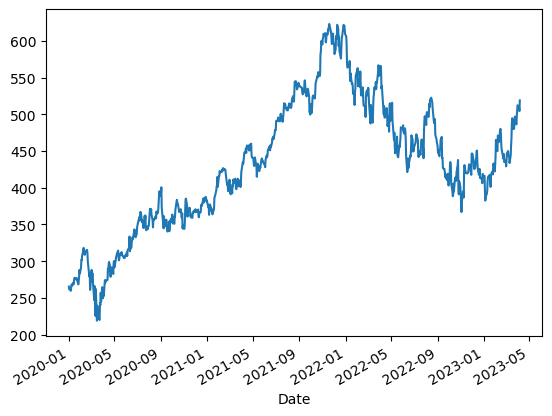

In [136]:
msft['Close_log_1.12'].plot();

In [138]:
msft['Сlose_season_diff'] = msft['Close_log_1.12'] - msft['Close_log_1.12'].shift(12)

In [139]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,ses_a_0.001,ses_a_0.01,ses_a_0.1,ses_a_0.3,Close_log_1.12,Сlose_season_diff
Date,,,,,,,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,154.215668,22622100,NaN,160.619995,160.619995,160.619995,160.619995,265.319282,NaN
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.295395,21116200,NaN,160.619995,160.619995,160.619995,160.619995,261.602366,NaN
2020-01-06,157.080002,159.100006,156.509995,159.029999,152.689072,20813700,NaN,160.617995,160.599995,160.419995,160.019995,262.363876,NaN
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.296906,21634100,NaN,160.616407,160.584295,160.280995,159.722996,259.671839,NaN
2020-01-08,158.929993,160.800003,157.949997,160.089996,153.706787,27746500,NaN,160.613371,160.554252,160.010896,159.080098,264.333748,NaN


In [140]:
msft['foo'] = msft['Close'] - msft['Close'].shift(2)
msft.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,ses_a_0.001,ses_a_0.01,ses_a_0.1,ses_a_0.3,Close_log_1.12,Сlose_season_diff,foo
Date,,,,,,,,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,154.215668,22622100,NaN,160.619995,160.619995,160.619995,160.619995,265.319282,NaN,NaN
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.295395,21116200,NaN,160.619995,160.619995,160.619995,160.619995,261.602366,NaN,NaN
2020-01-06,157.080002,159.100006,156.509995,159.029999,152.689072,20813700,NaN,160.617995,160.599995,160.419995,160.019995,262.363876,NaN,-1.589996
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.296906,21634100,NaN,160.616407,160.584295,160.280995,159.722996,259.671839,NaN,-1.039993
2020-01-08,158.929993,160.800003,157.949997,160.089996,153.706787,27746500,NaN,160.613371,160.554252,160.010896,159.080098,264.333748,NaN,1.059998


Обратите внимание: после этой операции в новом ряде из-за смещения будут значения NaN. От них нужно избавиться.

In [147]:
# msft.dropna(inplace=True)
msft.fillna(value=0, inplace=True)
msft.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,ses_a_0.001,ses_a_0.01,ses_a_0.1,ses_a_0.3,Close_log_1.12,Сlose_season_diff,foo
Date,,,,,,,,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,154.215668,22622100,0.0,160.619995,160.619995,160.619995,160.619995,265.319282,0.0,0.000000
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.295395,21116200,0.0,160.619995,160.619995,160.619995,160.619995,261.602366,0.0,0.000000
2020-01-06,157.080002,159.100006,156.509995,159.029999,152.689072,20813700,0.0,160.617995,160.599995,160.419995,160.019995,262.363876,0.0,-1.589996
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.296906,21634100,0.0,160.616407,160.584295,160.280995,159.722996,259.671839,0.0,-1.039993
2020-01-08,158.929993,160.800003,157.949997,160.089996,153.706787,27746500,0.0,160.613371,160.554252,160.010896,159.080098,264.333748,0.0,1.059998


In [114]:
test = adfuller(msft['Сlose_season_diff'])
if test[0]>test[4]['5%']:
    print('Ряд не стационарен')
else:
    print('OK, ряд стационарен')

OK, ряд стационарен


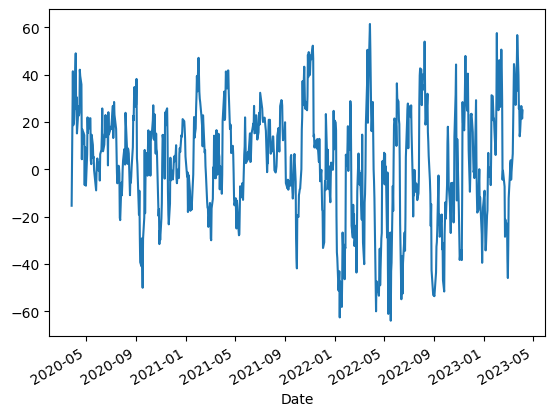

In [115]:
msft['Сlose_season_diff'].plot();

Если после сезонного дифференцирования сезонность в данных осталась, проведите ещё одно сезонное дифференцирование. Но уже с новым продифференцированным рядом.

И повторяйте, пока сезонности не останется. На практике, у меня ни разу не было такого, чтобы я делал сезонное дифференцирование больше двух раз. Но не нужно делать дифференцирование больше, чем необходимо. Если после первого раза сезонность пропала — оставьте его.

Далее тренд. Чтобы избавиться от него, применяем обычное дифференцирование. То есть при вычитании сдвигаем ряд на 1. И проводим дифференцирование, пока ряд не станет стационарным:

In [49]:
msft['Close_trend_diff'] = msft['Сlose_season_diff'] - msft['Сlose_season_diff'].shift(1)

In [50]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,ses_a_0.01,ses_a_0.1,ses_a_0.3,Close_log_1.12,Сlose_season_diff,Close_trend_diff
Date,,,,,,,,,,,,,
2020-03-13,147.500000,161.910004,140.729996,158.830002,152.913574,92727400,168.767999,163.887146,163.839613,152.976987,261.992387,-21.152152,NaN
2020-03-16,140.000000,149.350006,135.000000,135.419998,130.375580,87905900,168.263999,163.836575,163.338652,154.732891,218.921843,-41.863563,-20.711411
2020-03-17,140.000000,147.500000,135.000000,146.570007,141.110229,81059800,168.023000,163.552409,160.546787,148.939023,239.331379,-28.574496,13.289067
2020-03-18,138.000000,146.000000,135.020004,140.399994,135.170074,81593200,167.650399,163.382585,159.149109,148.228319,228.013073,-60.043437,-31.468941
2020-03-19,142.770004,150.149994,139.000000,142.710007,137.394058,85922700,167.353000,163.152759,157.274197,145.879821,232.243598,-40.321236,19.722201


In [51]:
msft.dropna(inplace=True)

## Декомпозиция ряда на сезон и тренд

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
# произведем декомпозицию временного ряда 

decomposition = seasonal_decompose(msft['Close'], period=30)

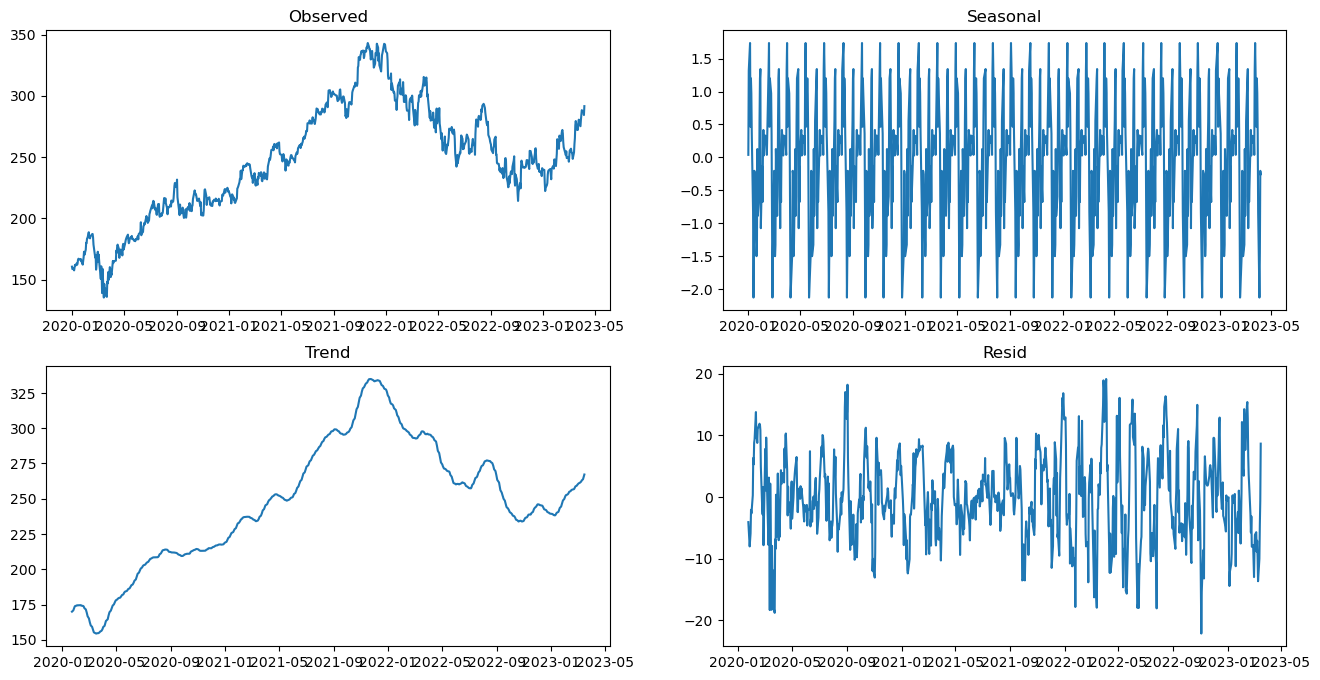

In [152]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

axs[0, 0].plot(decomposition.observed)
axs[0, 0].set_title('Observed')
axs[1, 0].plot(decomposition.trend)
axs[1, 0].set_title('Trend')
axs[0, 1].plot(decomposition.seasonal)
axs[0, 1].set_title('Seasonal')
axs[1, 1].plot(decomposition.resid)
axs[1, 1].set_title('Resid')
# axs[1, 1].set_xlabel('Date')
# fig.savefig('decomp.jpg')
plt.show()